In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import AgglomerativeClustering
# import csv

# # 加载数据集
# def load_iris_dataset(filename):
#     with open(filename, 'r') as csvfile:
#         csvreader = csv.reader(csvfile)
#         next(csvreader)  # Skip header if present
#         dataset = [list(map(float, row[:-1])) for row in csvreader if row]  # Exclude the label
#     return dataset

# # 绘制聚类图
# def plot_clusters(data, cluster_labels):
#     plt.figure(figsize=(10, 8))
#     plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow')
#     plt.title("Cluster Visualization")
#     plt.xlabel("Feature 1")
#     plt.ylabel("Feature 2")
#     plt.show()

# # 计算轮廓系数
# def calculate_silhouette(data, cluster_labels):
#     return silhouette_score(data, cluster_labels)

# # 使用 scipy 进行层次聚类的实现函数
# def scipy_hierarchical_clustering(data, method):
#     Z = linkage(data, method=method)
#     dendrogram(Z)
#     plt.show()
#     cluster_labels = fcluster(Z, t=num_clusters, criterion='maxclust')
#     return cluster_labels - 1  # 减1是为了让标签从0开始

# # 使用 scikit-learn 进行层次聚类的实现函数
# def sklearn_hierarchical_clustering(data, method):
#     clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=method)
#     cluster_labels = clustering.fit_predict(data)
#     return cluster_labels

# # Use the function to load the dataset
# iris_dataset = np.array(load_iris_dataset('./dataset/iris.data'))

# # Perform hierarchical clustering with different linkage methods
# num_clusters = 3
# labels_single = sklearn_hierarchical_clustering(iris_dataset, 'single')
# labels_complete = sklearn_hierarchical_clustering(iris_dataset, 'complete')
# labels_average = sklearn_hierarchical_clustering(iris_dataset, 'average')
# labels_ward = sklearn_hierarchical_clustering(iris_dataset, 'ward')

# # Plot the clusters
# plot_clusters(iris_dataset, labels_ward)

# # Calculate silhouette scores
# silhouette_single = calculate_silhouette(iris_dataset, labels_single)
# silhouette_complete = calculate_silhouette(iris_dataset, labels_complete)
# silhouette_average = calculate_silhouette(iris_dataset, labels_average)
# silhouette_ward = calculate_silhouette(iris_dataset, labels_ward)

# # Print silhouette scores
# print(f"Silhouette Coefficient for single-linkage: {silhouette_single}")
# print(f"Silhouette Coefficient for complete-linkage: {silhouette_complete}")
# print(f"Silhouette Coefficient for average-linkage: {silhouette_average}")
# print(f"Silhouette Coefficient for Ward's method: {silhouette_ward}")

# # Find the best linkage method based on silhouette score
# best_method = max(
#     [
#         ('single', silhouette_single),
#         ('complete', silhouette_complete),
#         ('average', silhouette_average),
#         ('ward', silhouette_ward)
#     ],
#     key=lambda x: x[1]
# )

# print(f"The best linkage method is: {best_method[0]} with a silhouette score of {best_method[1]}")

### analysis

In [2]:
# from sklearn import datasets
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage

# # Load the iris dataset
# iris = datasets.load_iris()
# X = iris.data
# feature_names = iris.feature_names
# true_labels = iris.target
# true_label_names = iris.target_names

# # Perform hierarchical clustering
# linked = linkage(X, method='ward')

# # Create a dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(linked, orientation='top', labels=true_label_names[true_labels], distance_sort='descending', show_leaf_counts=True)
# plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
# plt.xlabel('Sample index')
# plt.ylabel('Distance')
# plt.show()

In [3]:
# from sklearn import datasets
# import pandas as pd
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the iris dataset
# iris = datasets.load_iris()
# X = iris.data
# feature_names = iris.feature_names
# true_labels = iris.target
# true_label_names = iris.target_names

# # Perform hierarchical clustering
# linked = linkage(X, method='ward')

# # Determine the number of clusters, e.g., 3 for the Iris dataset
# k = 3

# # Use fcluster to extract labels from a cluster formed by hierarchical clustering
# clusters_hc = fcluster(linked, t=k, criterion='maxclust')

# # Create a DataFrame with the features and both true labels and hierarchical clustering labels
# iris_df = pd.DataFrame(X, columns=feature_names)
# iris_df['TrueLabel'] = [true_label_names[i] for i in true_labels]
# iris_df['Cluster_HC'] = clusters_hc

# # Visualize the dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(linked, orientation='top', labels=true_label_names[true_labels], distance_sort='descending', show_leaf_counts=True)
# plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
# plt.xlabel('Sample index')
# plt.ylabel('Distance')
# plt.show()

# # Visualize the clusters with a pairplot
# sns.pairplot(iris_df, hue='Cluster_HC', palette='bright')
# plt.suptitle('Hierarchical Clustering (Iris Dataset)', fontsize=16)
# plt.show()

Single-linkage clustering took 0.32903623580932617 seconds
Complete-linkage clustering took 0.46810436248779297 seconds
Average-linkage clustering took 0.6036856174468994 seconds
Ward's method clustering took 3.4948933124542236 seconds
Silhouette Coefficient for single-linkage: 0.5090689670612821
Silhouette Coefficient for complete-linkage: 0.48326881977704095
Silhouette Coefficient for average-linkage: 0.551545299987358
Silhouette Coefficient for Ward's method: 0.5093580572587506
The best linkage method is: average with a silhouette score of 0.551545299987358
Plotting single linkage dendrogram and pairplot.


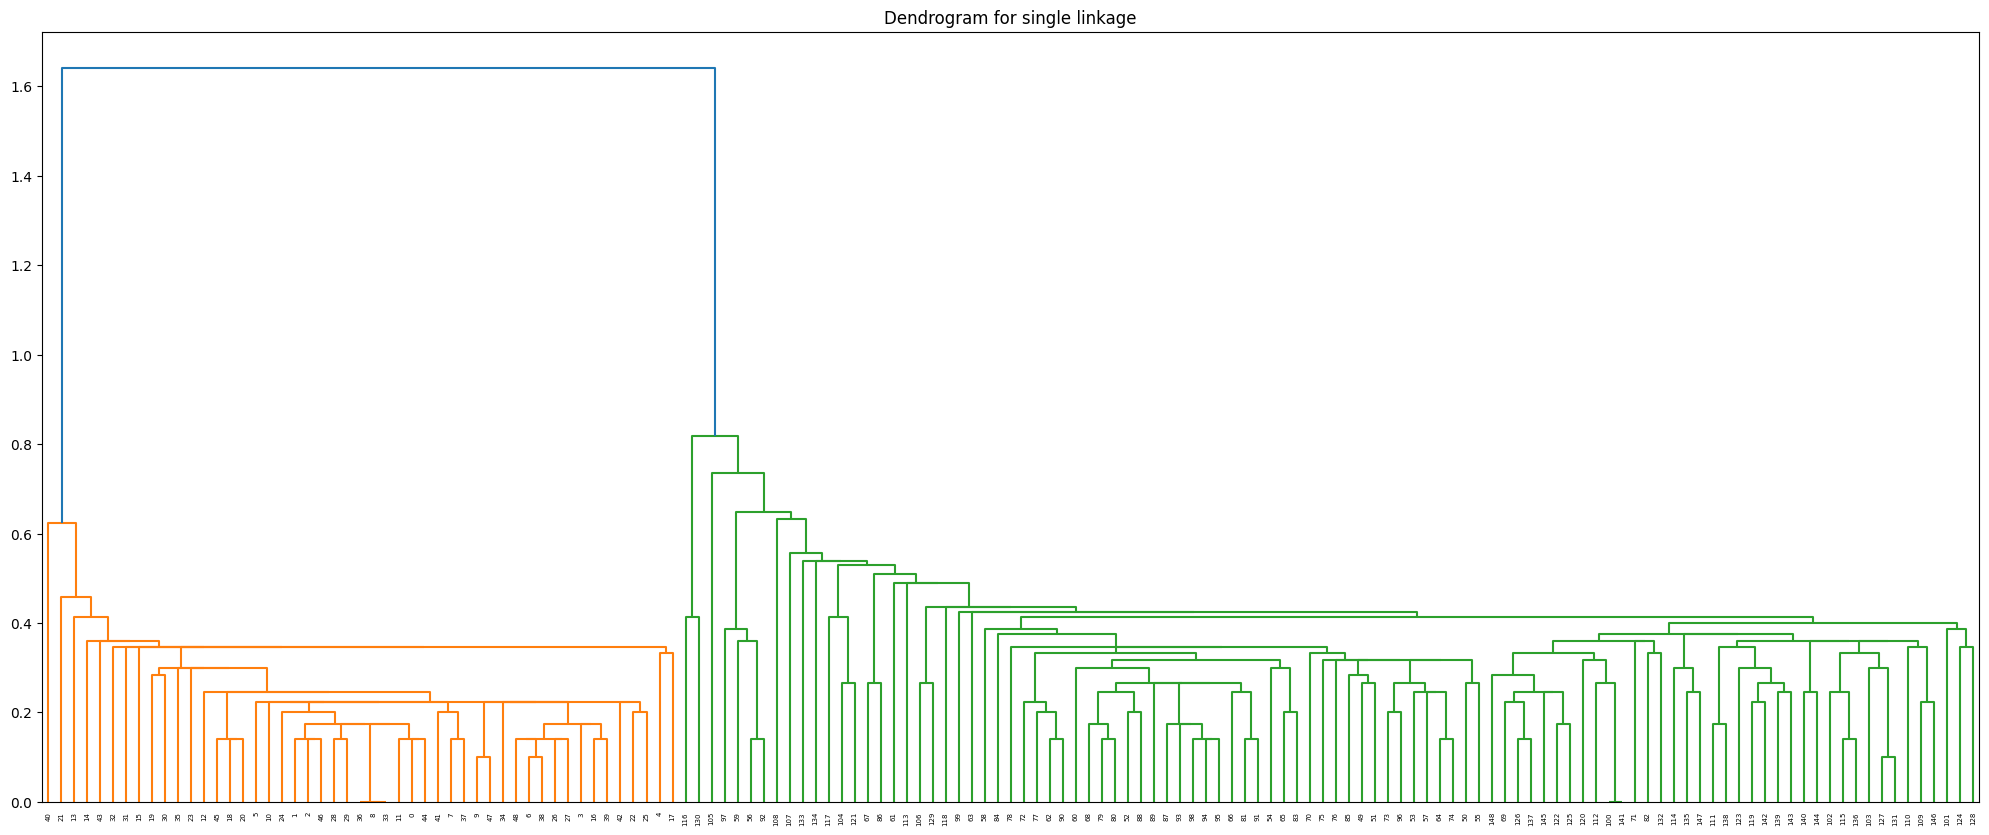

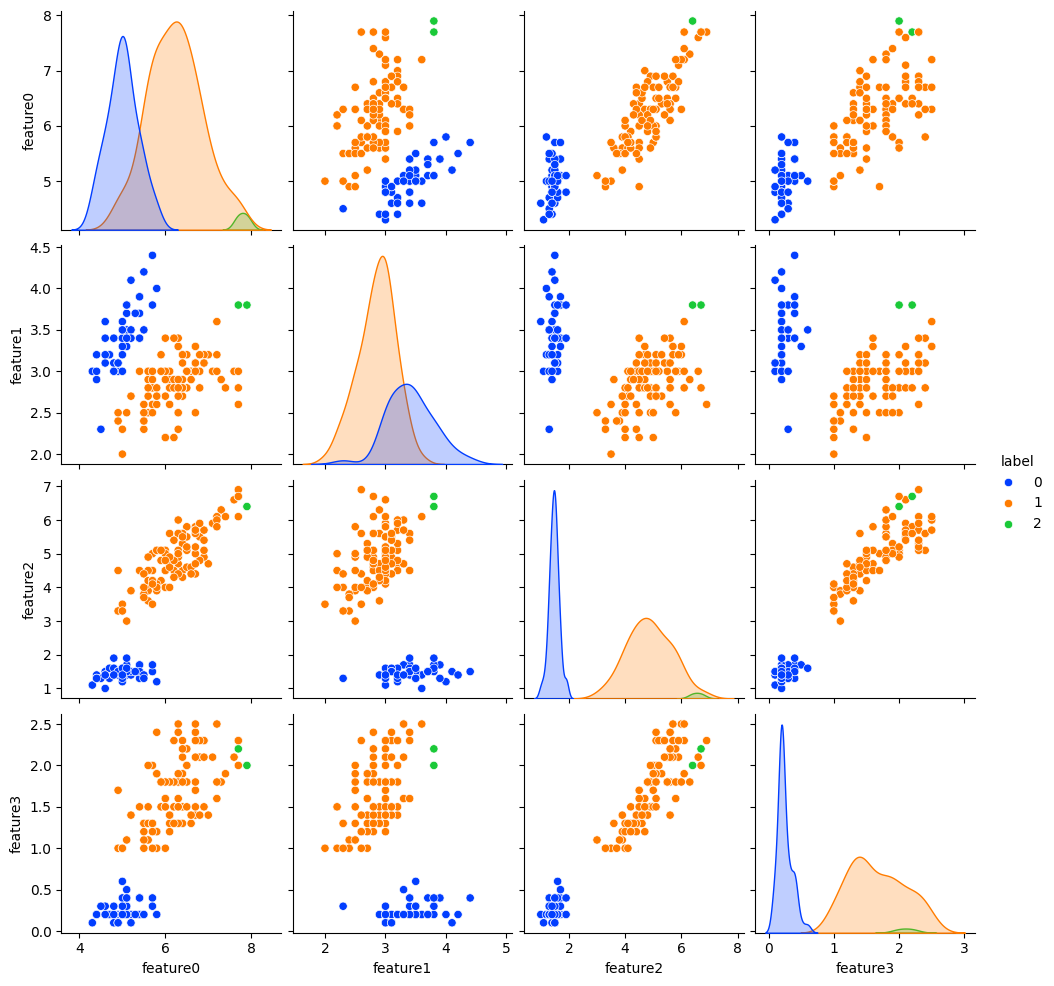

Plotting complete linkage dendrogram and pairplot.


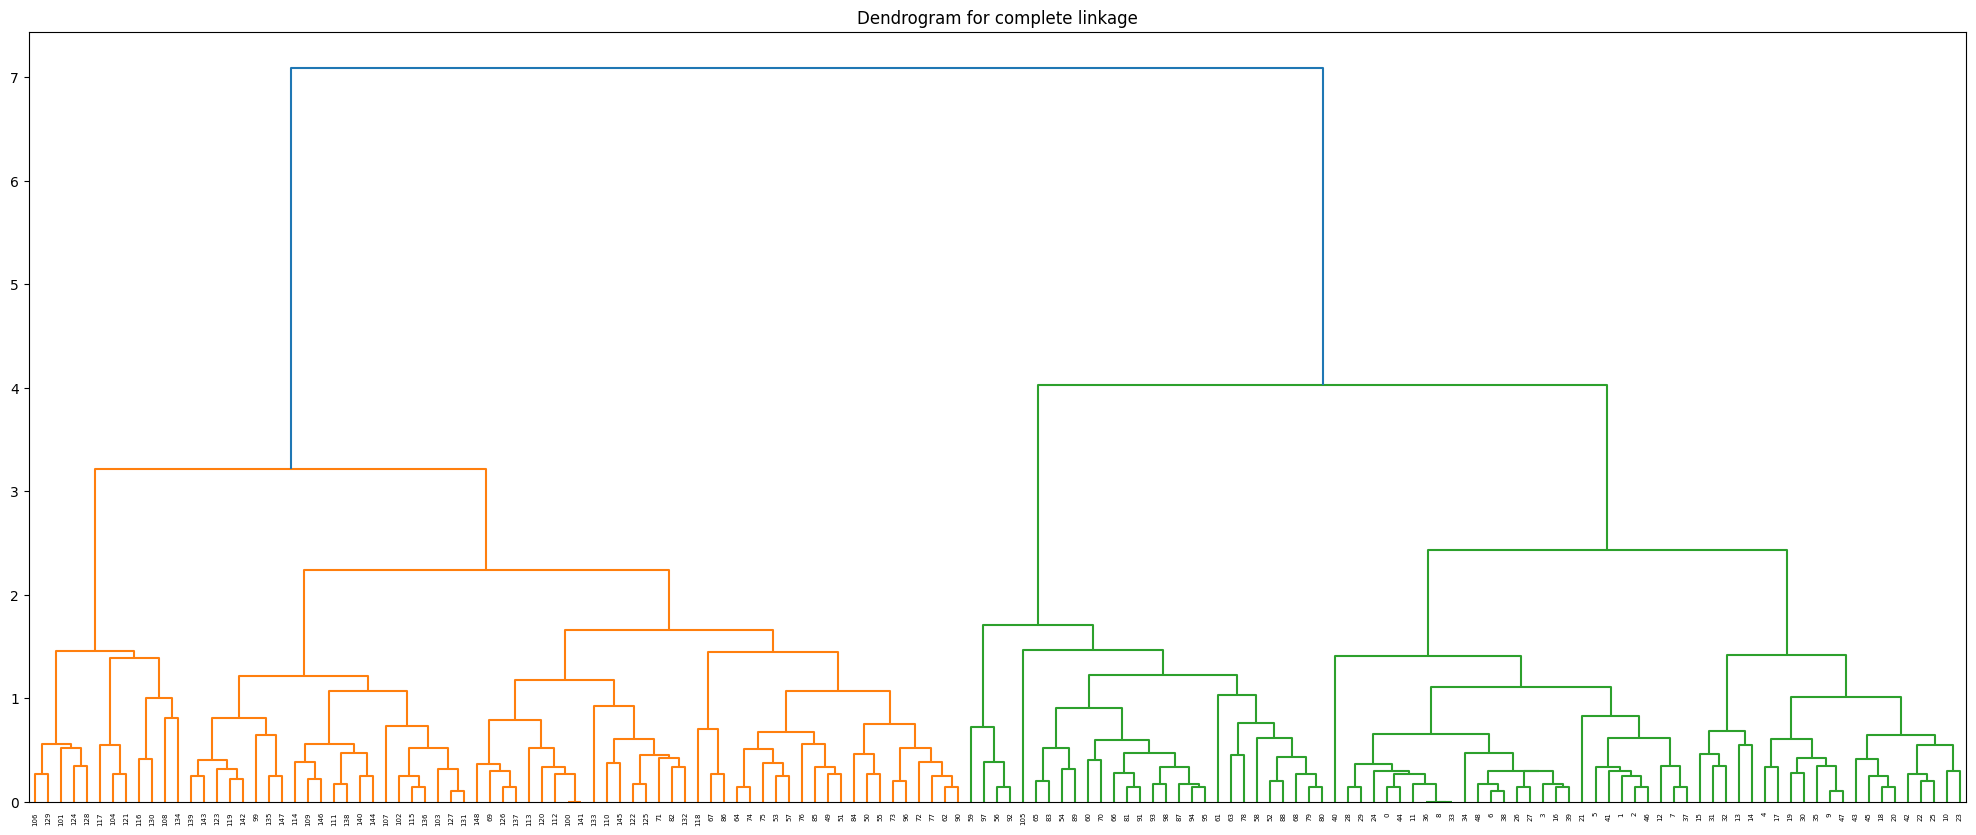

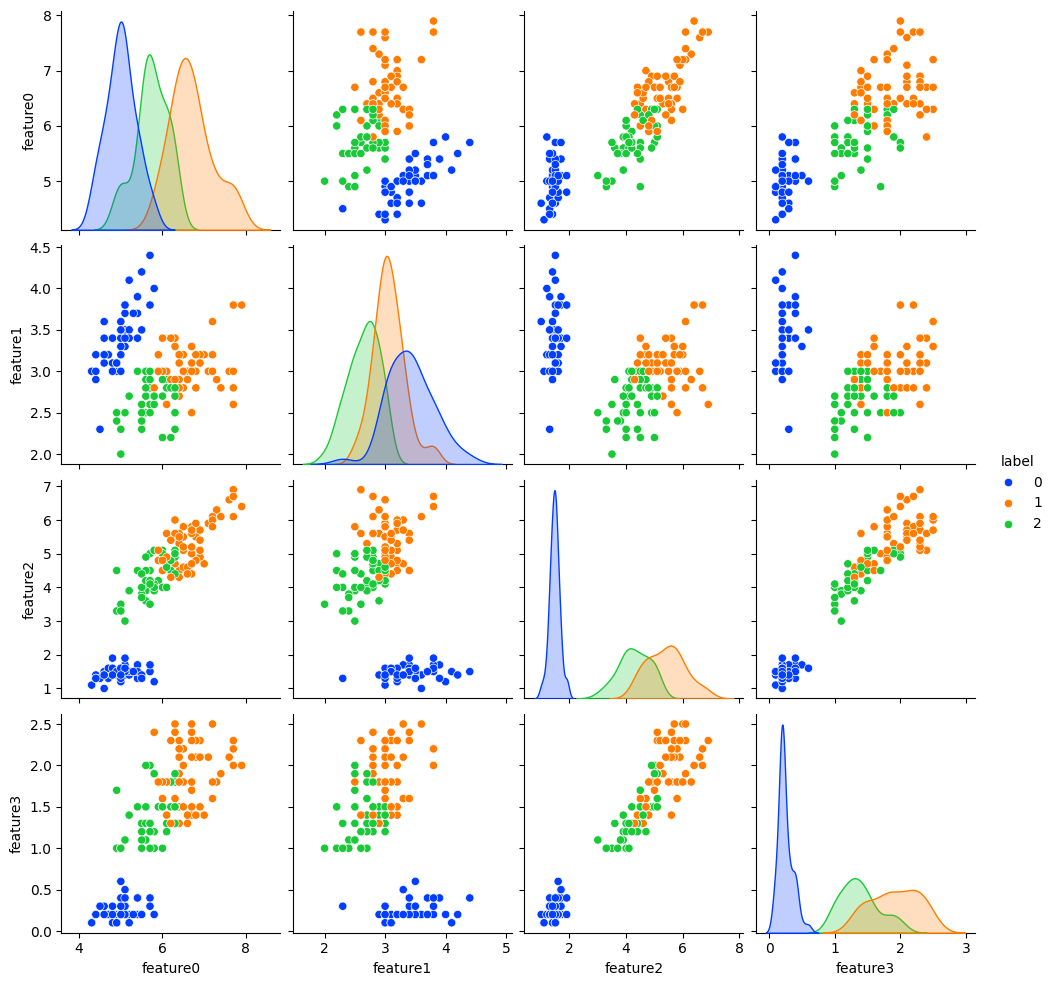

Plotting average linkage dendrogram and pairplot.


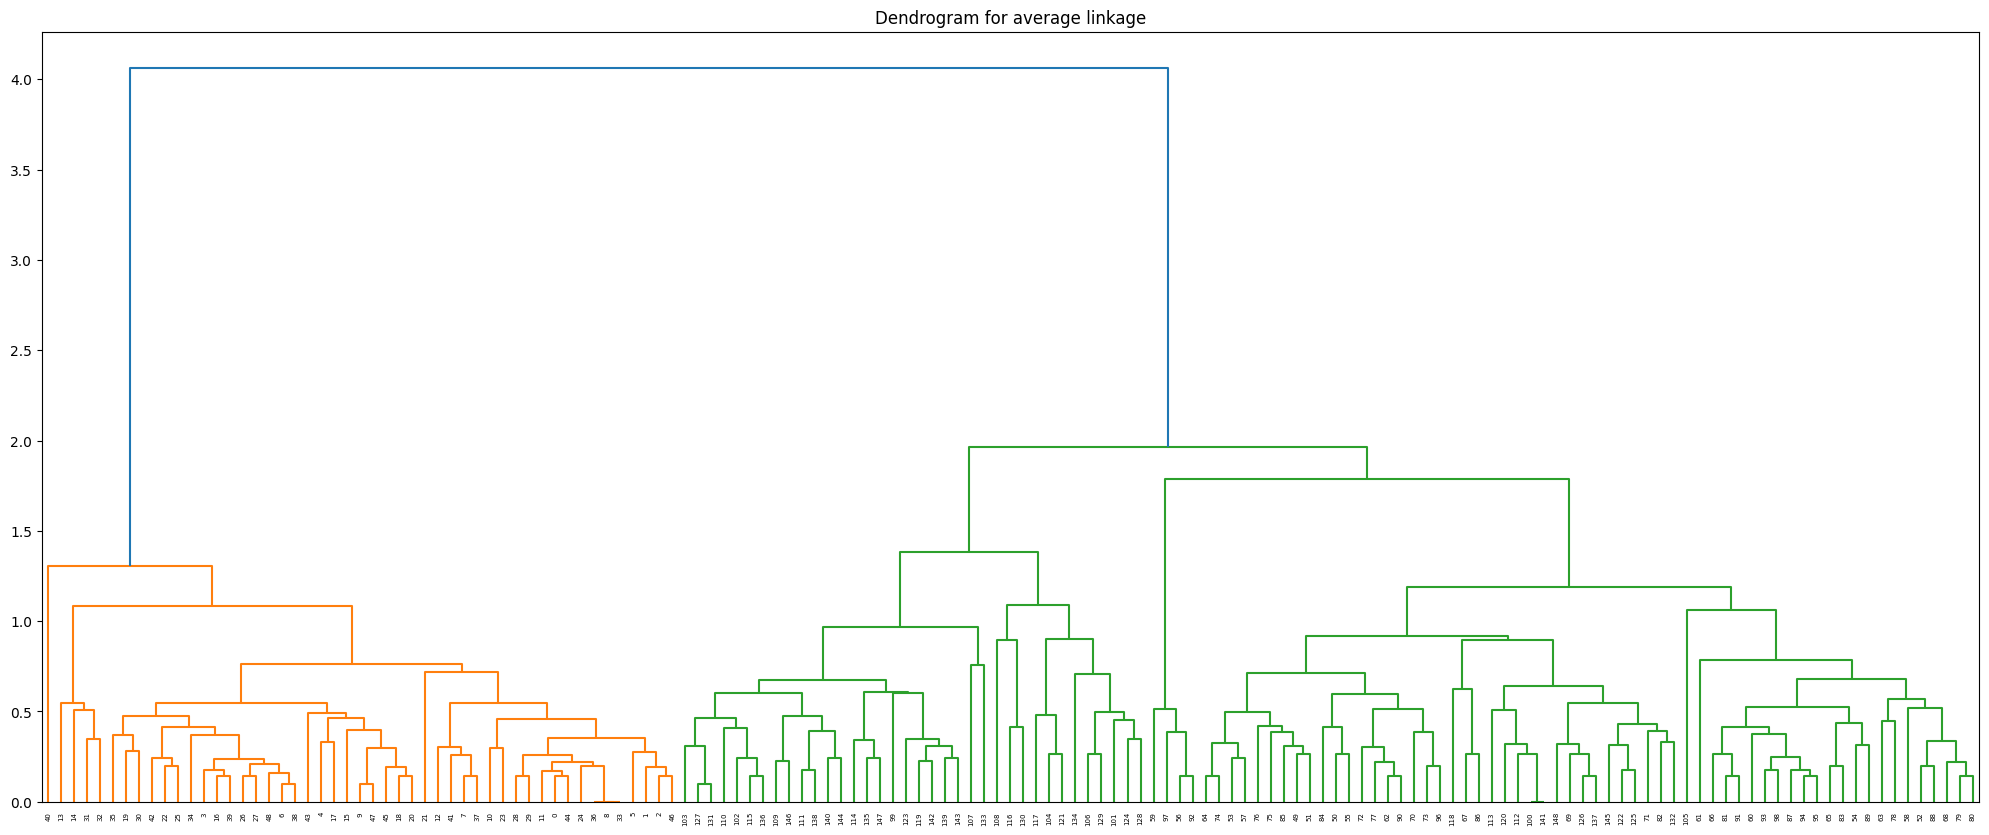

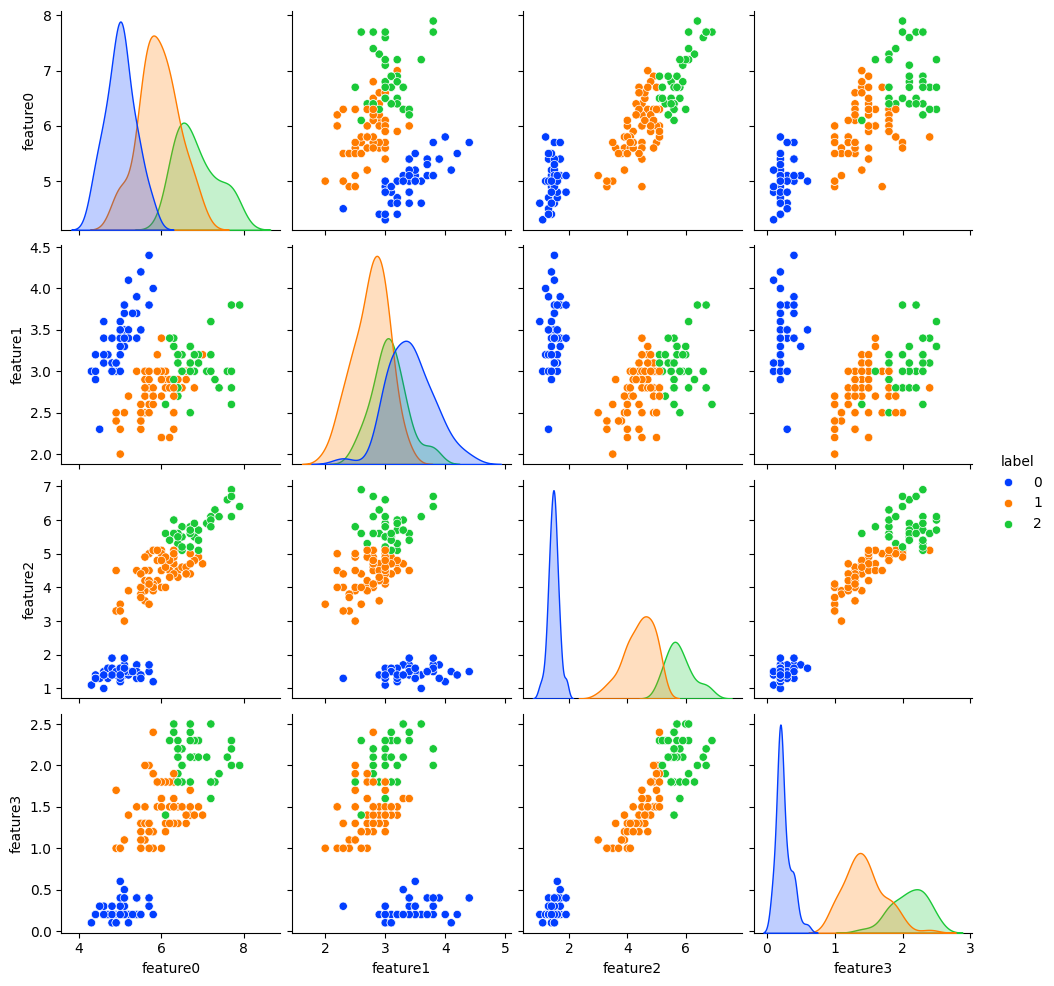

Plotting ward linkage dendrogram and pairplot.


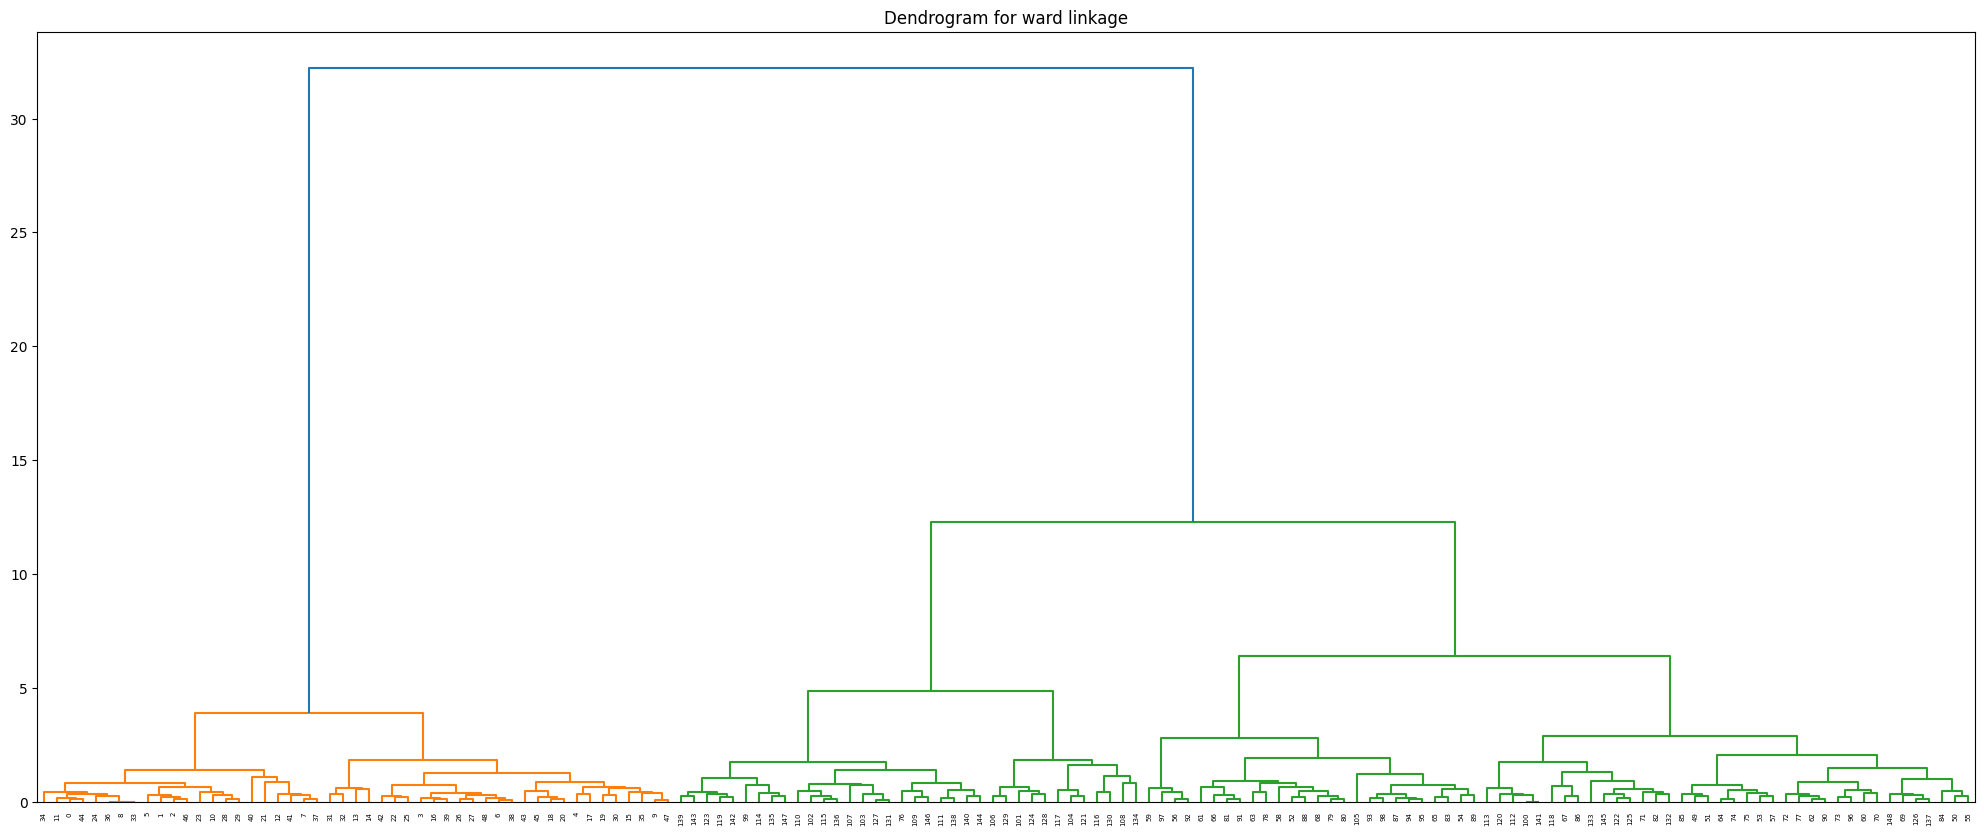

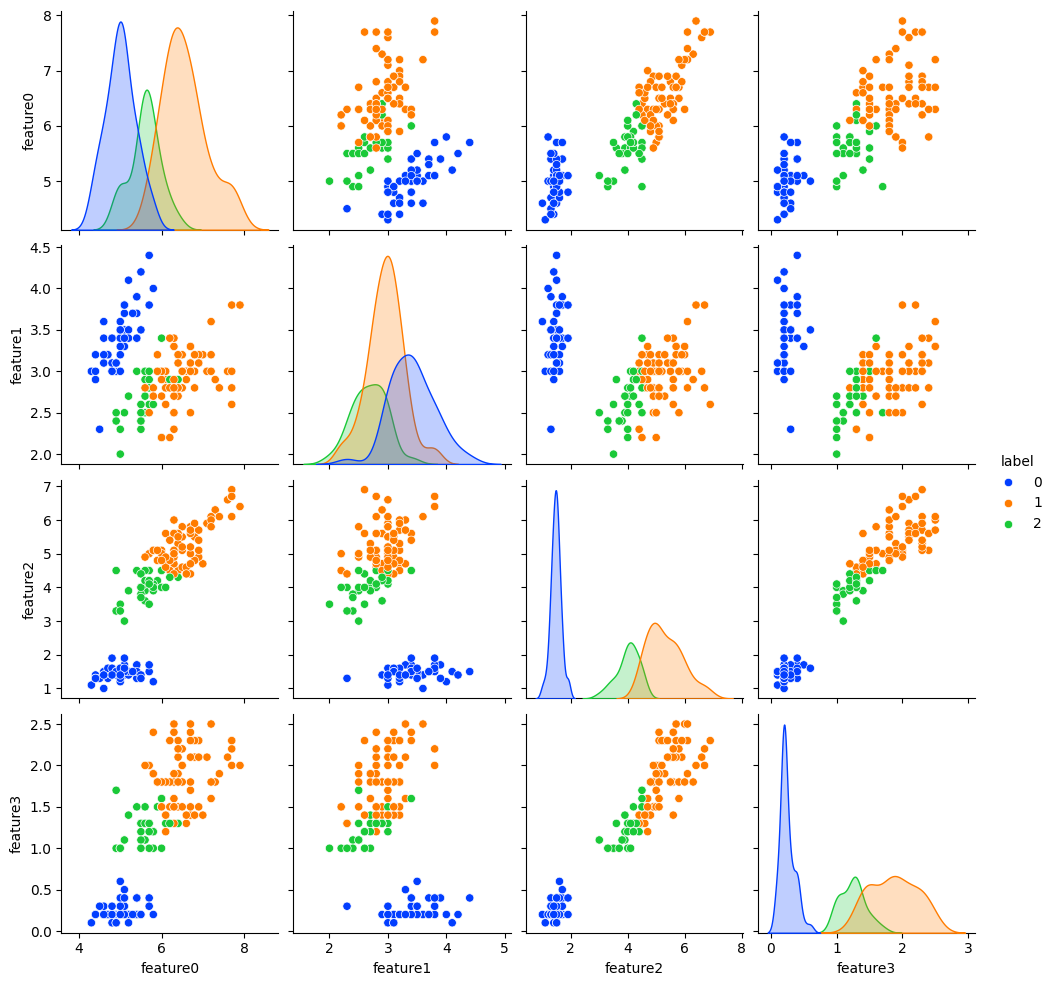

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
import csv
import heapq
import time
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import pandas as pd

# Function to plot dendrogram
def plot_dendrogram(data, method):
    Z = linkage(data, method=method)
    plt.figure(figsize=(25, 10))
    plt.title(f'Dendrogram for {method} linkage')
    dendrogram(Z)
    plt.show()

# Function to plot pairplot
def plot_pairplot(data, labels):
    # Convert the data to a DataFrame for seaborn compatibility
    df = pd.DataFrame(data, columns=[f'feature{i}' for i in range(data.shape[1])])
    df['label'] = labels
    sns.pairplot(df, hue='label', palette='bright')
    plt.show()

# 加载数据集
def load_iris_dataset(filename):
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip header if present
        dataset = [list(map(float, row[:-1])) for row in csvreader if row]  # Exclude the label
    return dataset


# 距离计算方法
def single_linkage(cluster1, cluster2, distance_matrix):
    return np.min([distance_matrix[i][j] for i in cluster1 for j in cluster2])

def complete_linkage(cluster1, cluster2, distance_matrix):
    return np.max([distance_matrix[i][j] for i in cluster1 for j in cluster2])

def average_linkage(cluster1, cluster2, distance_matrix):
    return np.mean([distance_matrix[i][j] for i in cluster1 for j in cluster2])

def ward_linkage(cluster1, cluster2, data):
    # Calculate the centroids of the clusters
    centroid1 = np.mean(data[cluster1], axis=0)
    centroid2 = np.mean(data[cluster2], axis=0)
    merged_cluster = np.vstack((data[cluster1], data[cluster2]))
    merged_centroid = np.mean(merged_cluster, axis=0)

    # Compute the sum of squares within each cluster
    ssw_cluster1 = np.sum((data[cluster1] - centroid1) ** 2)
    ssw_cluster2 = np.sum((data[cluster2] - centroid2) ** 2)
    ssw_merged_cluster = np.sum((merged_cluster - merged_centroid) ** 2)

    # The increase in the sum of squares is the criterion for Ward's method
    return ssw_merged_cluster - (ssw_cluster1 + ssw_cluster2)



def calculate_silhouette(data, cluster_labels):
    return silhouette_score(data, cluster_labels)

# def hierarchical_clustering(data, linkage, num_clusters):
#     # Initialize clusters, each data point is a singleton cluster initially
#     clusters = {i: [i] for i in range(len(data))}
#     # Initialize a list to store cluster labels for each data point
#     cluster_labels = [-1] * len(data)
#     # Initialize the distance matrix
#     distance_matrix = squareform(pdist(data, 'euclidean'))
    
#     # Perform clustering until we reach the desired number of clusters
#     while len(clusters) > num_clusters:
#         # Find the two closest clusters
#         min_distance = np.inf
#         to_merge = (-1, -1)
#         for i in clusters.keys():
#             for j in clusters.keys():
#                 if i < j:
#                     d = linkage(clusters[i], clusters[j], distance_matrix)
#                     if d < min_distance:
#                         min_distance = d
#                         to_merge = (i, j)
#         # Merge the two clusters
#         merged_cluster = clusters[to_merge[0]] + clusters[to_merge[1]]
#         del clusters[to_merge[1]]
#         clusters[to_merge[0]] = merged_cluster
    
#     # Assign cluster labels based on the final clusters
#     for label, cluster in enumerate(clusters.values()):
#         for index in cluster:
#             cluster_labels[index] = label
    
#     return cluster_labels


def hierarchical_clustering(data, linkage, num_clusters):
    clusters = {i: [i] for i in range(len(data))}
    cluster_labels = [-1] * len(data)
    distance_matrix = squareform(pdist(data, 'euclidean'))
    
    # Create a priority queue with initial distances
    pq = []
    for i in clusters.keys():
        for j in clusters.keys():
            if i < j:
                d = linkage(clusters[i], clusters[j], distance_matrix)
                heapq.heappush(pq, (d, (i, j)))

    while len(clusters) > num_clusters:
        min_distance, (ci, cj) = heapq.heappop(pq)
        if ci not in clusters or cj not in clusters:
            # One or both clusters have been merged already
            continue

        # Merge the two clusters
        merged_cluster = clusters[ci] + clusters[cj]
        del clusters[cj]
        clusters[ci] = merged_cluster
        
        # Update the distances in the priority queue
        for ck in clusters.keys():
            if ck != ci:
                d = linkage(clusters[ci], clusters[ck], distance_matrix)
                heapq.heappush(pq, (d, (ci, ck)))

    # Assign cluster labels
    for label, cluster in enumerate(clusters.values()):
        for index in cluster:
            cluster_labels[index] = label

    return cluster_labels



# Use the function to load the dataset
iris_dataset = np.array(load_iris_dataset('./dataset/iris.data'))
# Perform hierarchical clustering with different linkage methods
num_clusters = 3

start_time = time.time()
labels_single = hierarchical_clustering(iris_dataset, single_linkage, num_clusters)
end_time = time.time()
print(f"Single-linkage clustering took {end_time - start_time} seconds")

start_time = time.time()
labels_complete = hierarchical_clustering(iris_dataset, complete_linkage, num_clusters)
end_time = time.time()
print(f"Complete-linkage clustering took {end_time - start_time} seconds")

start_time = time.time()
labels_average = hierarchical_clustering(iris_dataset, average_linkage, num_clusters)
end_time = time.time()
print(f"Average-linkage clustering took {end_time - start_time} seconds")

start_time = time.time()
labels_ward = hierarchical_clustering(iris_dataset, ward_linkage, num_clusters)
end_time = time.time()
print(f"Ward's method clustering took {end_time - start_time} seconds")

# Calculate silhouette scores
silhouette_single = calculate_silhouette(iris_dataset, labels_single)
silhouette_complete = calculate_silhouette(iris_dataset, labels_complete)
silhouette_average = calculate_silhouette(iris_dataset, labels_average)
silhouette_ward = calculate_silhouette(iris_dataset, labels_ward)

# Print silhouette scores
print(f"Silhouette Coefficient for single-linkage: {silhouette_single}")
print(f"Silhouette Coefficient for complete-linkage: {silhouette_complete}")
print(f"Silhouette Coefficient for average-linkage: {silhouette_average}")
print(f"Silhouette Coefficient for Ward's method: {silhouette_ward}")

# Find the best linkage method based on silhouette score
best_method = max(
    [
        ('single', silhouette_single),
        ('complete', silhouette_complete),
        ('average', silhouette_average),
        ('ward', silhouette_ward)
    ],
    key=lambda x: x[1]
)

print(f"The best linkage method is: {best_method[0]} with a silhouette score of {best_method[1]}")

cluster_labels_dict = {
    'single': labels_single,
    'complete': labels_complete,
    'average': labels_average,
    'ward': labels_ward
}

# Function to plot dendrogram
def plot_dendrogram(data, method):
    Z = linkage(data, method=method)
    plt.figure(figsize=(25, 10))
    plt.title(f'Dendrogram for {method} linkage')
    dendrogram(Z)
    plt.show()

# Function to plot pairplot
def plot_pairplot(data, labels):
    # Convert the data to a DataFrame for seaborn compatibility
    df = pd.DataFrame(data, columns=[f'feature{i}' for i in range(data.shape[1])])
    df['label'] = labels
    sns.pairplot(df, hue='label', palette='bright')
    plt.show()

# Calculate labels for all linkage methods
labels_dict = {
    'single': hierarchical_clustering(iris_dataset, single_linkage, num_clusters),
    'complete': hierarchical_clustering(iris_dataset, complete_linkage, num_clusters),
    'average': hierarchical_clustering(iris_dataset, average_linkage, num_clusters),
    'ward': hierarchical_clustering(iris_dataset, ward_linkage, num_clusters)
}

# Plot dendrogram and pairplot for all linkage methods
for method, labels in labels_dict.items():
    print(f"Plotting {method} linkage dendrogram and pairplot.")
    plot_dendrogram(iris_dataset, method)
    plot_pairplot(iris_dataset, labels)


### zjk

Single-linkage clustering took 4.49160623550415 seconds
Complete-linkage clustering took 4.7417151927948 seconds
Average-linkage clustering took 6.768918037414551 seconds
Ward's method clustering took 71.97743105888367 seconds
Silhouette Coefficient for single-linkage: 0.5090689670612821
Silhouette Coefficient for complete-linkage: 0.5108037362352527
Silhouette Coefficient for average-linkage: 0.551545299987358
Silhouette Coefficient for Ward's method: 0.5108037362352527
The best linkage method is: average with a silhouette score of 0.551545299987358
Plotting single linkage dendrogram and pairplot.


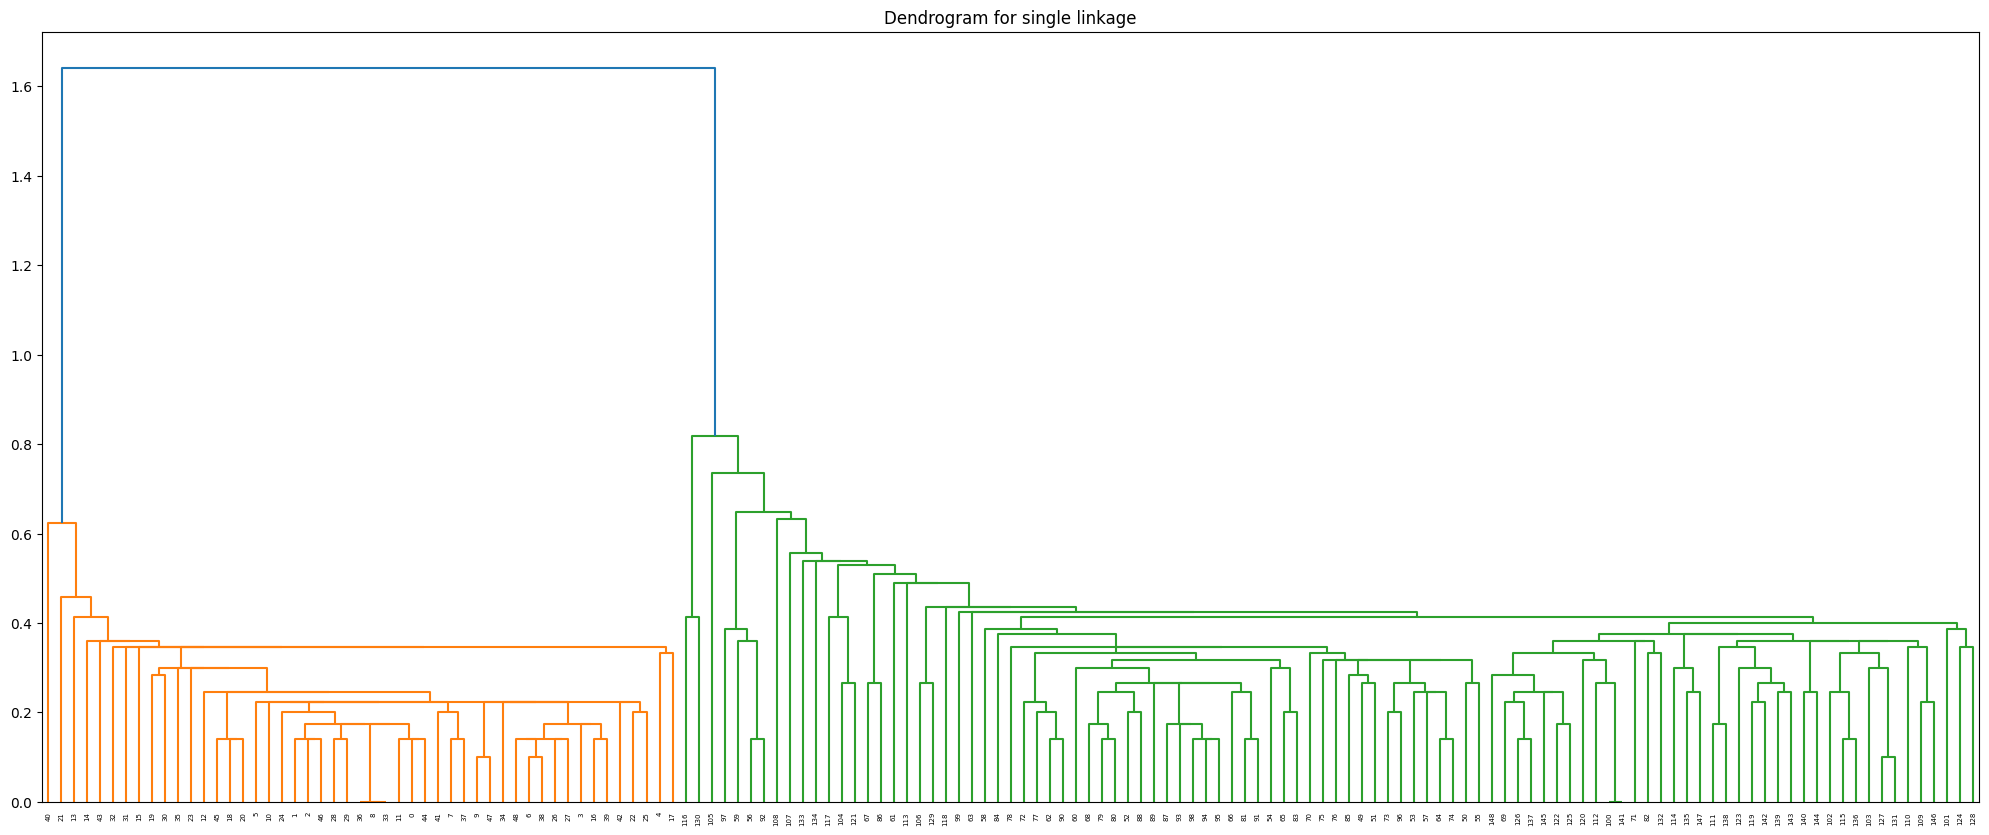

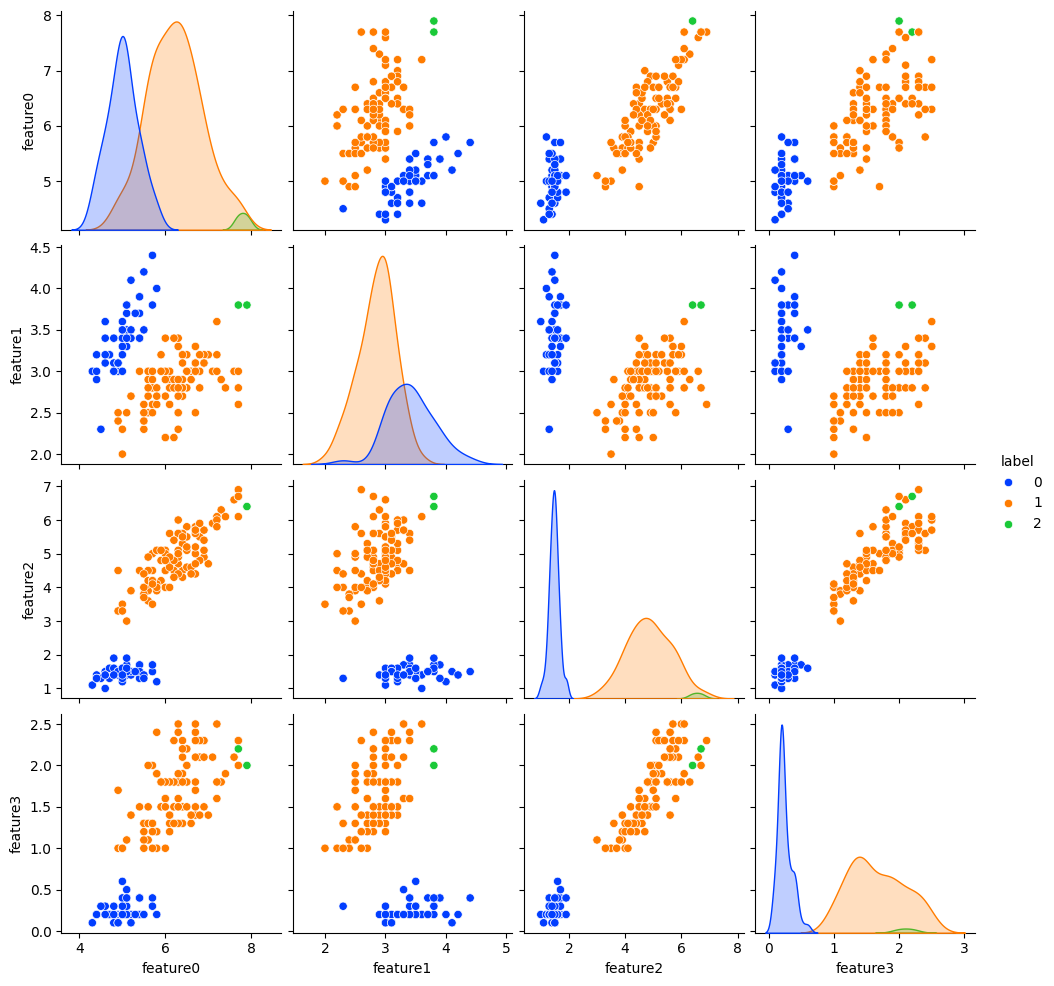

Plotting complete linkage dendrogram and pairplot.


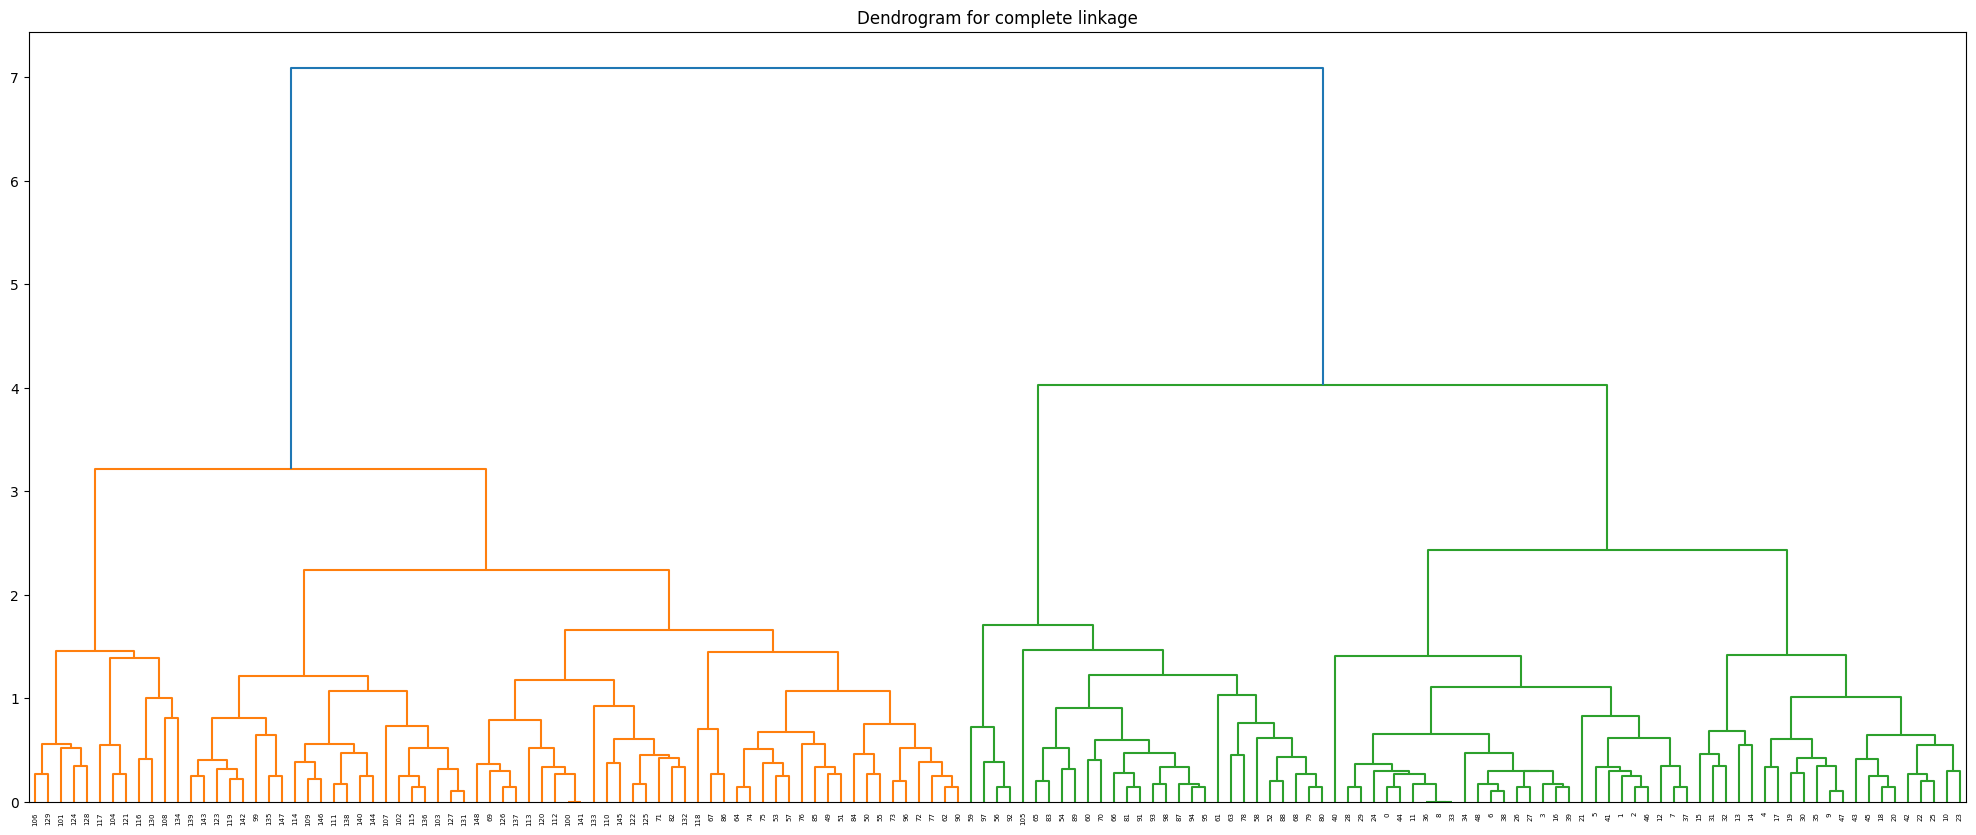

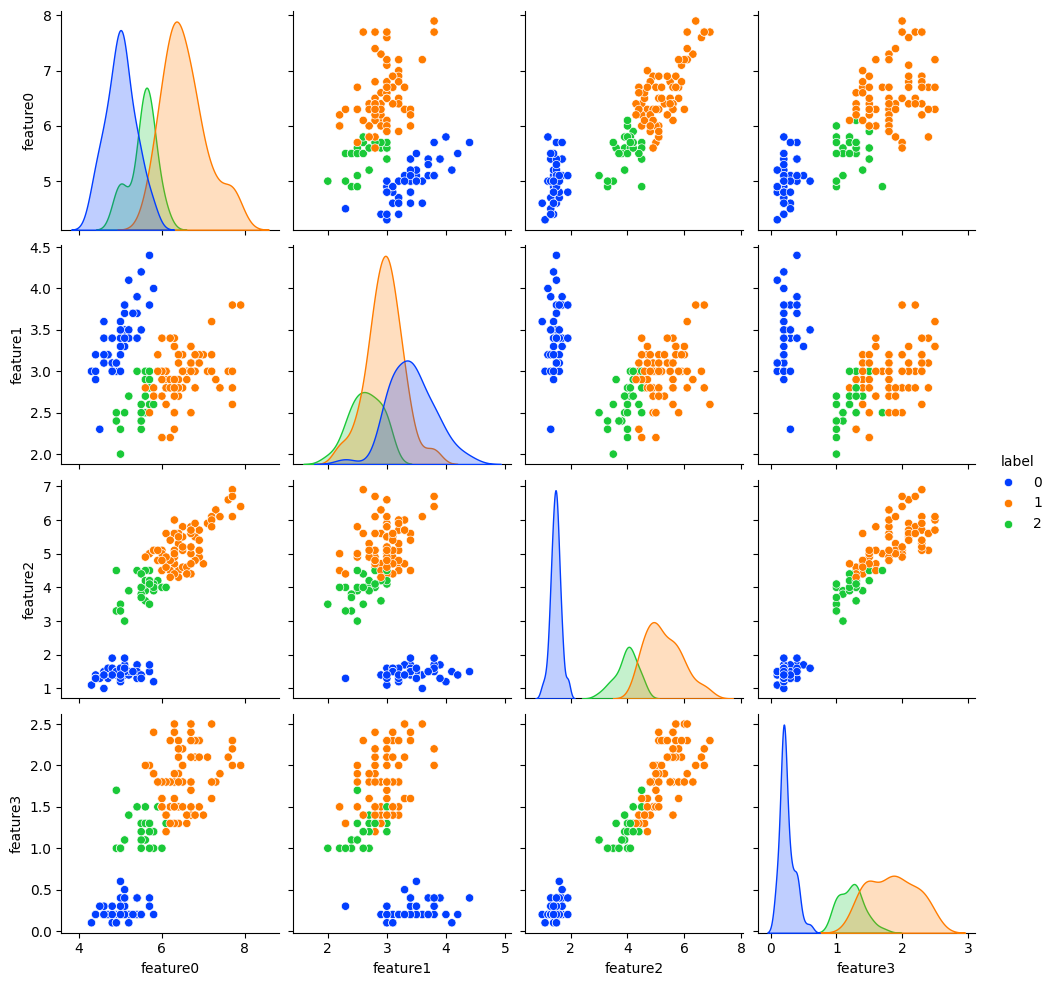

Plotting average linkage dendrogram and pairplot.


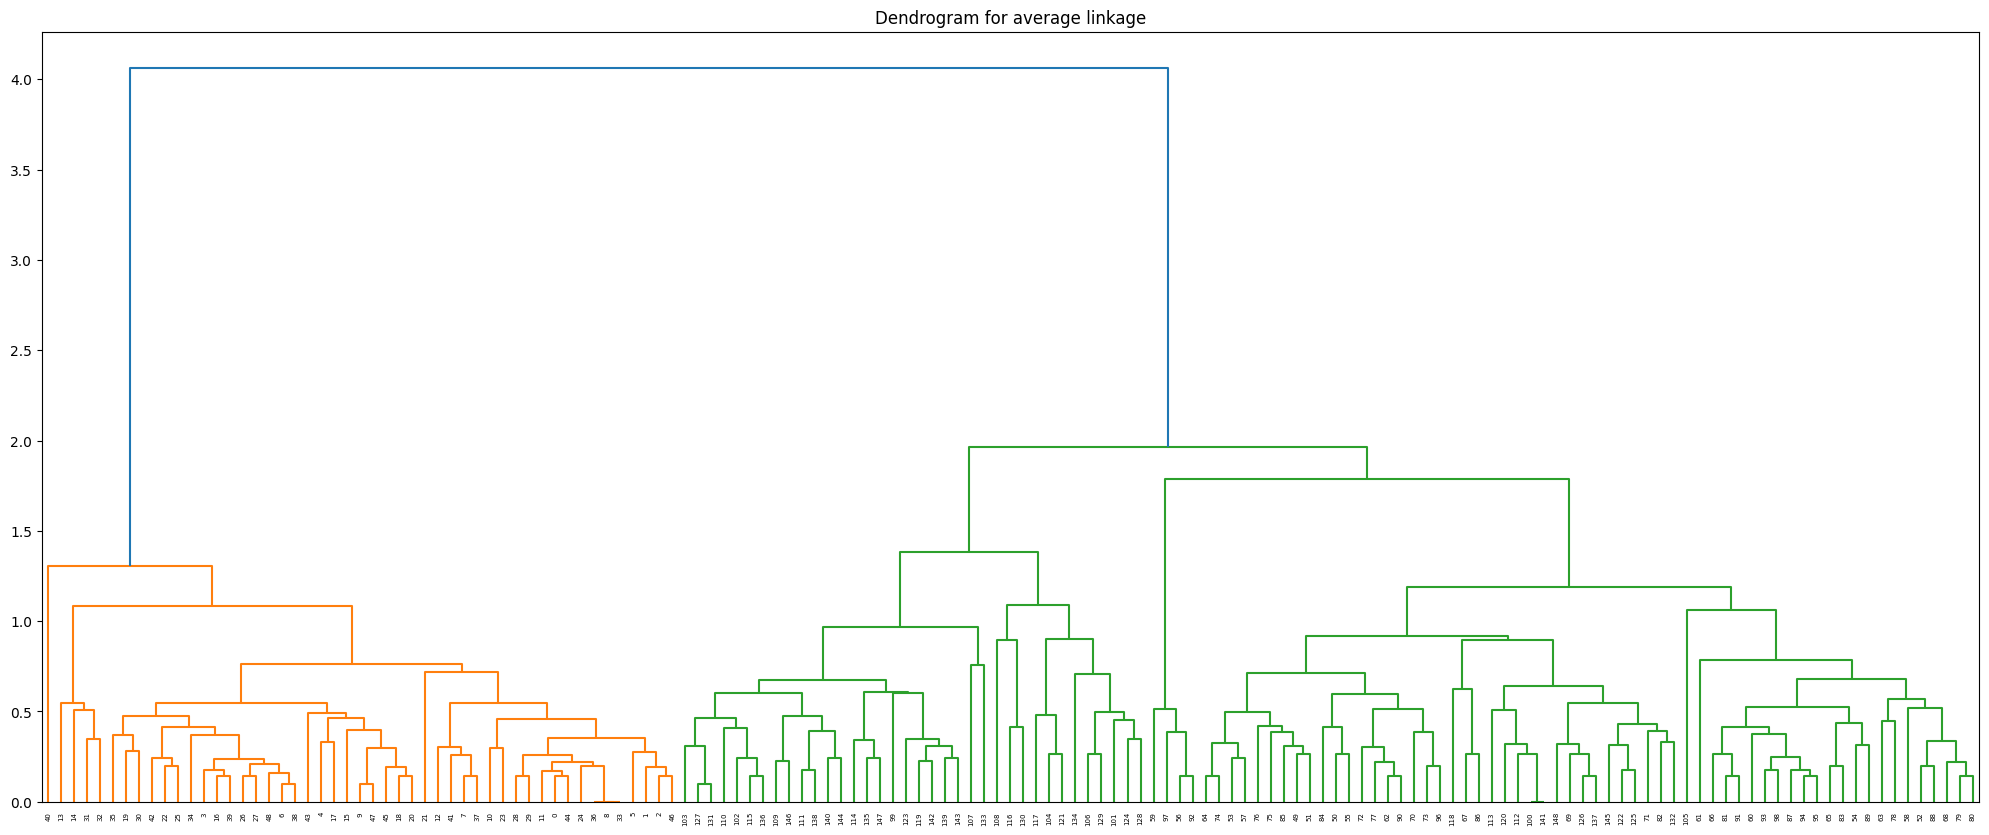

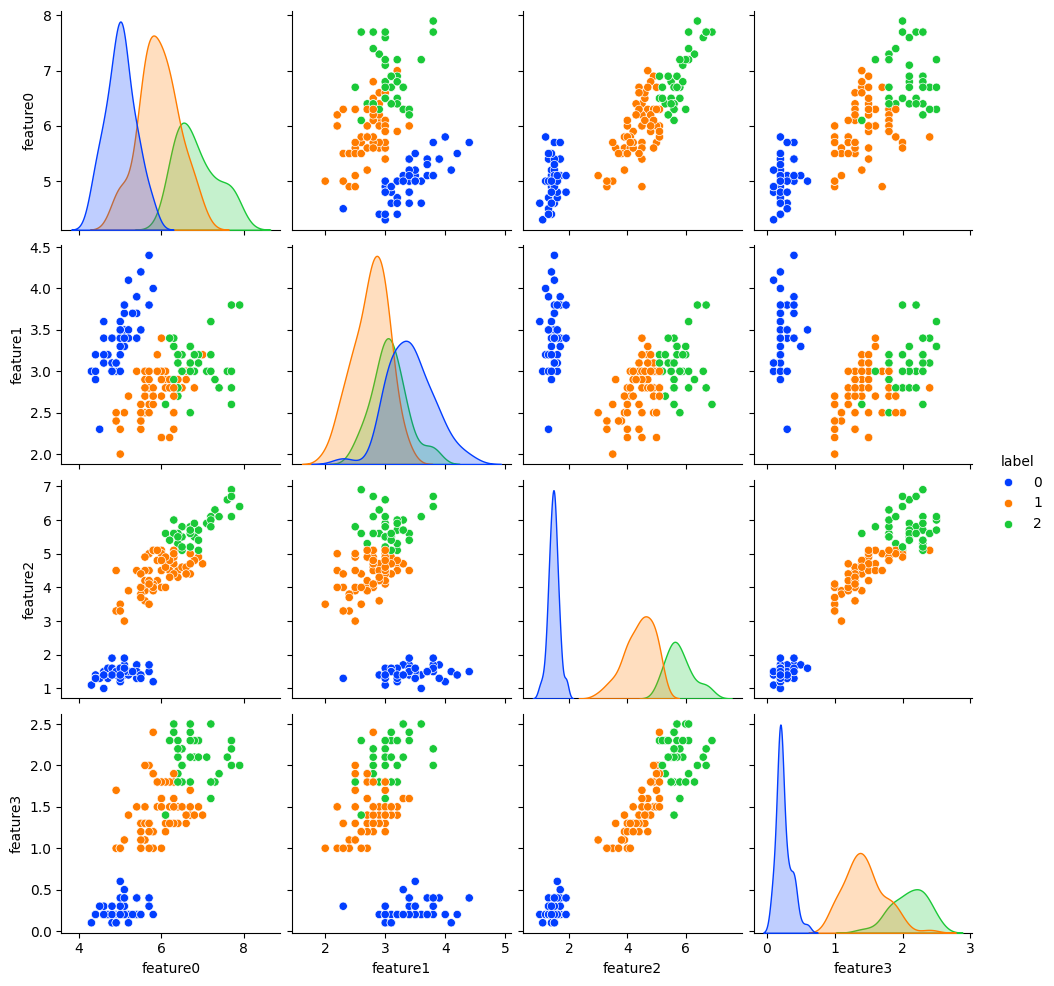

Plotting ward linkage dendrogram and pairplot.


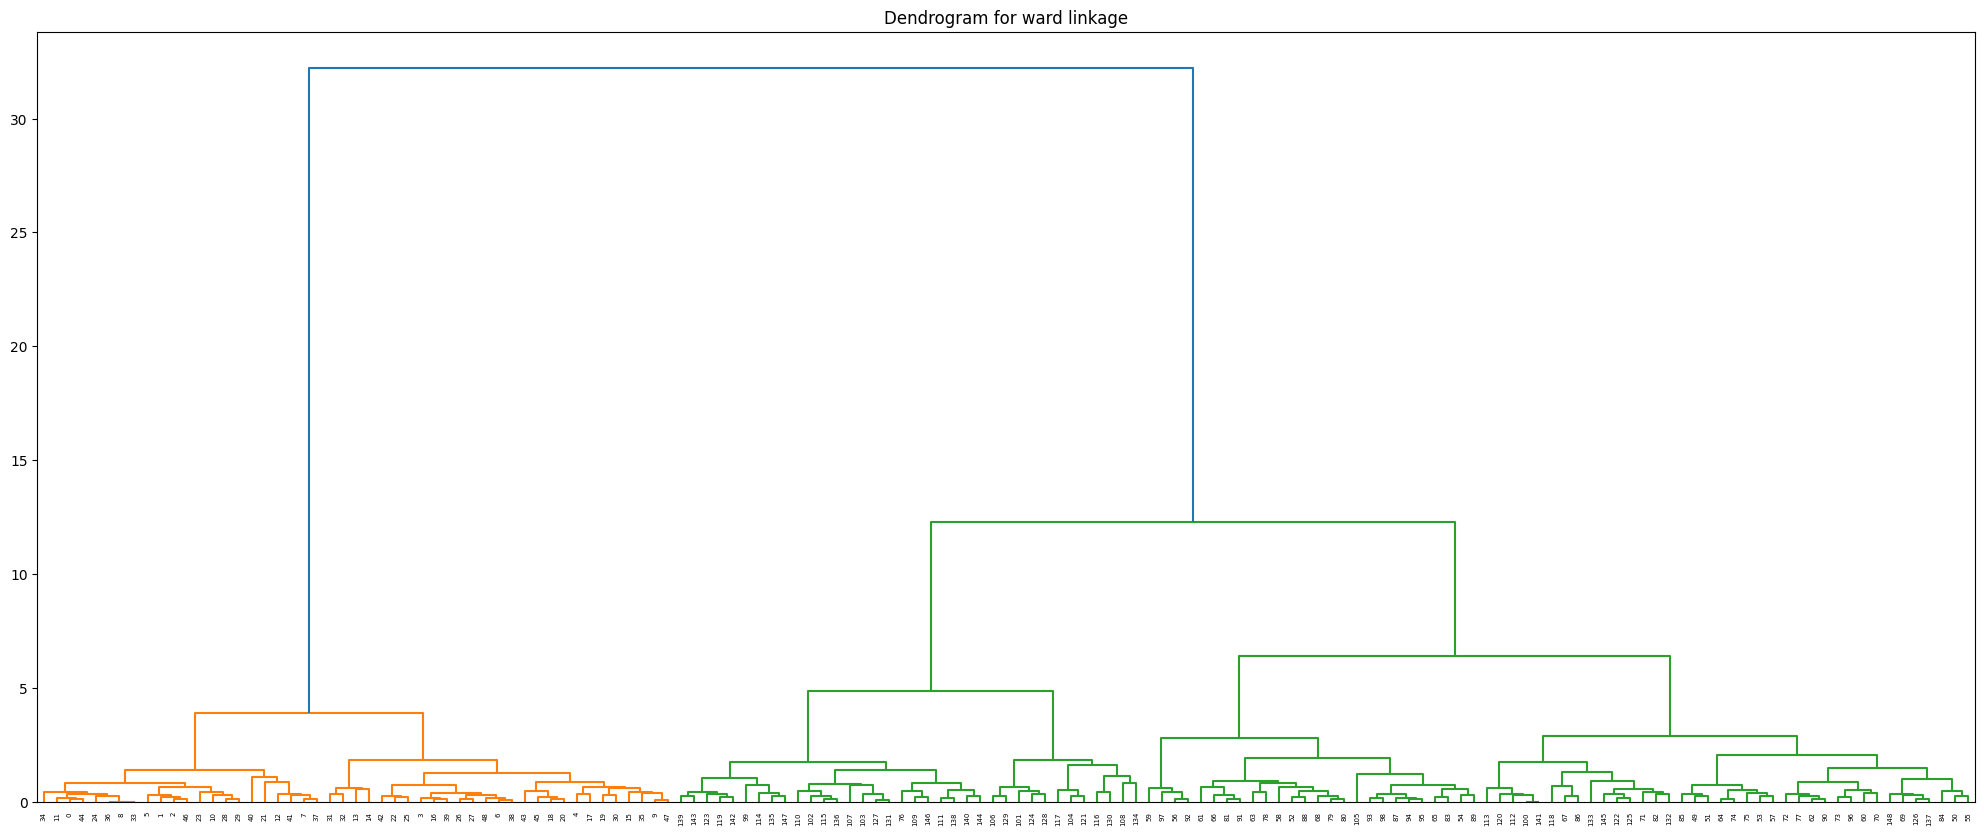

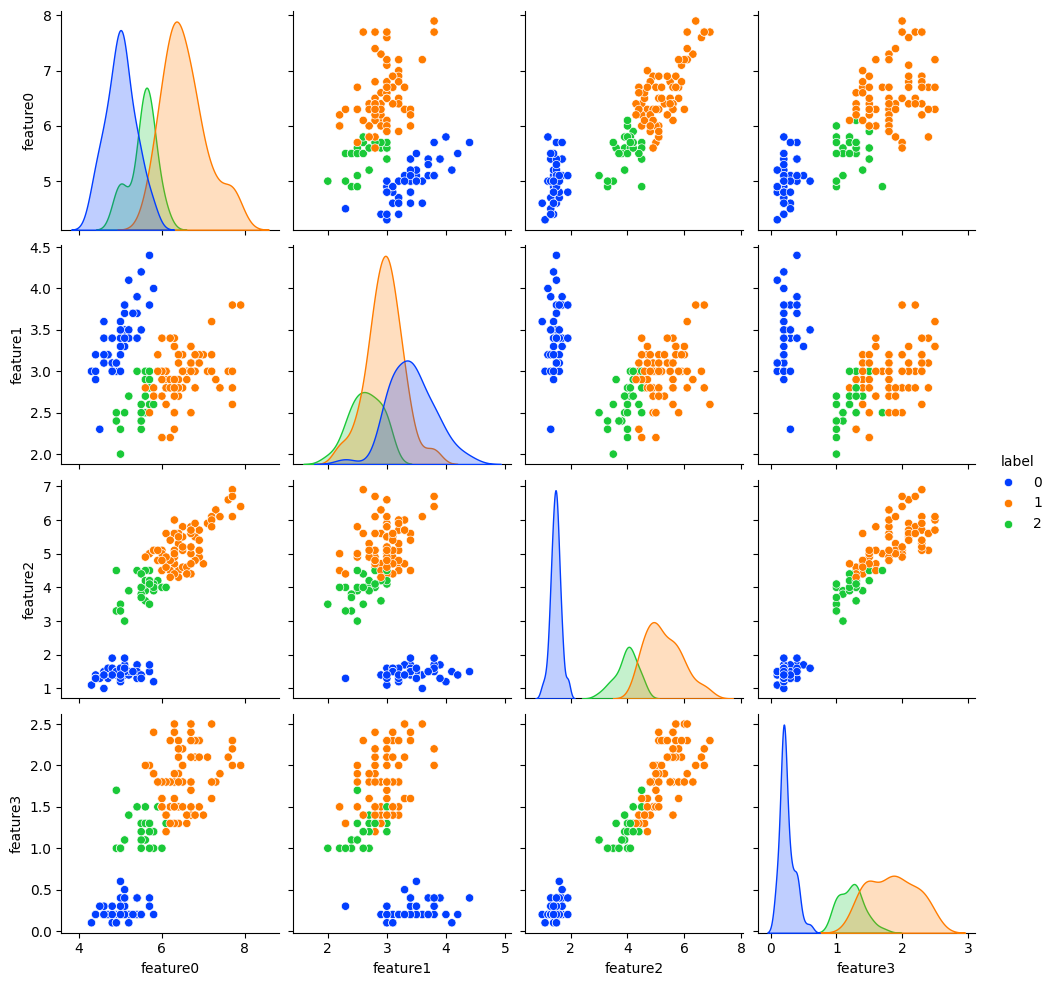

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
import csv
import heapq
import time
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import pandas as pd


# Function to plot dendrogram
def plot_dendrogram(data, method):
    Z = linkage(data, method=method)
    plt.figure(figsize=(25, 10))
    plt.title(f'Dendrogram for {method} linkage')
    dendrogram(Z)
    plt.show()

# Function to plot pairplot
def plot_pairplot(data, labels):
    # Convert the data to a DataFrame for seaborn compatibility
    df = pd.DataFrame(data, columns=[f'feature{i}' for i in range(data.shape[1])])
    df['label'] = labels
    sns.pairplot(df, hue='label', palette='bright')
    plt.show()




# Function to plot dendrogram
def plot_dendrogram(data, method):
    Z = linkage(data, method=method)
    plt.figure(figsize=(25, 10))
    plt.title(f'Dendrogram for {method} linkage')
    dendrogram(Z)
    plt.show()

# Function to plot pairplot
def plot_pairplot(data, labels):
    # Convert the data to a DataFrame for seaborn compatibility
    df = pd.DataFrame(data, columns=[f'feature{i}' for i in range(data.shape[1])])
    df['label'] = labels
    sns.pairplot(df, hue='label', palette='bright')
    plt.show()

# 加载数据集
def load_iris_dataset(filename):
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip header if present
        dataset = [list(map(float, row[:-1])) for row in csvreader if row]  # Exclude the label
    return dataset


# 距离计算方法
def single_linkage(cluster1, cluster2, distance_matrix):
    return np.min([distance_matrix[i][j] for i in cluster1 for j in cluster2])

def complete_linkage(cluster1, cluster2, distance_matrix):
    return np.max([distance_matrix[i][j] for i in cluster1 for j in cluster2])

def average_linkage(cluster1, cluster2, distance_matrix):
    return np.mean([distance_matrix[i][j] for i in cluster1 for j in cluster2])

def ward_linkage(cluster1, cluster2, data):
    # Calculate the centroids of the clusters
    centroid1 = np.mean(data[cluster1], axis=0)
    centroid2 = np.mean(data[cluster2], axis=0)
    merged_cluster = np.vstack((data[cluster1], data[cluster2]))
    merged_centroid = np.mean(merged_cluster, axis=0)

    # Compute the sum of squares within each cluster
    ssw_cluster1 = np.sum((data[cluster1] - centroid1) ** 2)
    ssw_cluster2 = np.sum((data[cluster2] - centroid2) ** 2)
    ssw_merged_cluster = np.sum((merged_cluster - merged_centroid) ** 2)

    # The increase in the sum of squares is the criterion for Ward's method
    return ssw_merged_cluster - (ssw_cluster1 + ssw_cluster2)



def calculate_silhouette(data, cluster_labels):
    return silhouette_score(data, cluster_labels)

def hierarchical_clustering(data, linkage, num_clusters):
    # Initialize clusters, each data point is a singleton cluster initially
    clusters = {i: [i] for i in range(len(data))}
    # Initialize a list to store cluster labels for each data point
    cluster_labels = [-1] * len(data)
    # Initialize the distance matrix
    distance_matrix = squareform(pdist(data, 'euclidean'))
    
    # Perform clustering until we reach the desired number of clusters
    while len(clusters) > num_clusters:
        # Find the two closest clusters
        min_distance = np.inf
        to_merge = (-1, -1)
        for i in clusters.keys():
            for j in clusters.keys():
                if i < j:
                    d = linkage(clusters[i], clusters[j], distance_matrix)
                    if d < min_distance:
                        min_distance = d
                        to_merge = (i, j)
        # Merge the two clusters
        merged_cluster = clusters[to_merge[0]] + clusters[to_merge[1]]
        del clusters[to_merge[1]]
        clusters[to_merge[0]] = merged_cluster
    
    # Assign cluster labels based on the final clusters
    for label, cluster in enumerate(clusters.values()):
        for index in cluster:
            cluster_labels[index] = label
    
    return cluster_labels





# Use the function to load the dataset
iris_dataset = np.array(load_iris_dataset('./dataset/iris.data'))
# Perform hierarchical clustering with different linkage methods
num_clusters = 3

start_time = time.time()
labels_single = hierarchical_clustering(iris_dataset, single_linkage, num_clusters)
end_time = time.time()
print(f"Single-linkage clustering took {end_time - start_time} seconds")

start_time = time.time()
labels_complete = hierarchical_clustering(iris_dataset, complete_linkage, num_clusters)
end_time = time.time()
print(f"Complete-linkage clustering took {end_time - start_time} seconds")

start_time = time.time()
labels_average = hierarchical_clustering(iris_dataset, average_linkage, num_clusters)
end_time = time.time()
print(f"Average-linkage clustering took {end_time - start_time} seconds")

start_time = time.time()
labels_ward = hierarchical_clustering(iris_dataset, ward_linkage, num_clusters)
end_time = time.time()
print(f"Ward's method clustering took {end_time - start_time} seconds")

# Calculate silhouette scores
silhouette_single = calculate_silhouette(iris_dataset, labels_single)
silhouette_complete = calculate_silhouette(iris_dataset, labels_complete)
silhouette_average = calculate_silhouette(iris_dataset, labels_average)
silhouette_ward = calculate_silhouette(iris_dataset, labels_ward)

# Print silhouette scores
print(f"Silhouette Coefficient for single-linkage: {silhouette_single}")
print(f"Silhouette Coefficient for complete-linkage: {silhouette_complete}")
print(f"Silhouette Coefficient for average-linkage: {silhouette_average}")
print(f"Silhouette Coefficient for Ward's method: {silhouette_ward}")

# Find the best linkage method based on silhouette score
best_method = max(
    [
        ('single', silhouette_single),
        ('complete', silhouette_complete),
        ('average', silhouette_average),
        ('ward', silhouette_ward)
    ],
    key=lambda x: x[1]
)

print(f"The best linkage method is: {best_method[0]} with a silhouette score of {best_method[1]}")

cluster_labels_dict = {
    'single': labels_single,
    'complete': labels_complete,
    'average': labels_average,
    'ward': labels_ward
}


# Calculate labels for all linkage methods
labels_dict = {
    'single': hierarchical_clustering(iris_dataset, single_linkage, num_clusters),
    'complete': hierarchical_clustering(iris_dataset, complete_linkage, num_clusters),
    'average': hierarchical_clustering(iris_dataset, average_linkage, num_clusters),
    'ward': hierarchical_clustering(iris_dataset, ward_linkage, num_clusters)
}

# Plot dendrogram and pairplot for all linkage methods
for method, labels in labels_dict.items():
    print(f"Plotting {method} linkage dendrogram and pairplot.")
    plot_dendrogram(iris_dataset, method)
    plot_pairplot(iris_dataset, labels)
